In [16]:
# Load libraries
import pandas as pd
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import KFold
from statistics import mean
import numpy as np

In [2]:
# Train data
X_train = pd.read_csv('x_train_smote_undersample.csv').to_numpy()
y_train = pd.read_csv('y_train_smote_undersample.csv')
y_train = y_train['LABEL']

# Test data
X_test = pd.read_csv('x_test_smote_undersample.csv').to_numpy()
y_test = pd.read_csv('y_test_smote_undersample.csv')
y_test = y_test['LABEL']

# Validation data
X_validation = pd.read_csv('x_validation_smote_undersample.csv').to_numpy()
y_validation = pd.read_csv('y_validation_smote_undersample.csv')
y_validation = y_validation['LABEL']

In [3]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=100,
                         learning_rate=1, random_state=0)
# Train Adaboost Classifer
abc.fit(X_train, y_train)

AdaBoostClassifier(learning_rate=1, n_estimators=100, random_state=0)

#### Validation data

In [4]:
abc.score(X_validation, y_validation)

0.6560083256414311

In [5]:
pred_validation = abc.predict(X_validation)

In [6]:
print(metrics.accuracy_score(y_validation, pred_validation))
print('Matriz de confusion', metrics.confusion_matrix(y_validation, pred_validation))
print(metrics.classification_report(y_validation, pred_validation, target_names=['0', '1', '2', '3']))

0.6560083256414311
Matriz de confusion [[122783  23635      0      0]
 [     1  55606      0      0]
 [ 50707      0      0      0]
 [ 19199      0      0      0]]


C:\Users\diana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.84      0.72    146418
           1       0.70      1.00      0.82     55607
           2       0.00      0.00      0.00     50707
           3       0.00      0.00      0.00     19199

    accuracy                           0.66    271931
   macro avg       0.33      0.46      0.39    271931
weighted avg       0.49      0.66      0.56    271931



C:\Users\diana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\diana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Test data

In [7]:
#Predict the response for test dataset
y_pred = abc.predict(X_test)

In [8]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.656143814526354


In [9]:
print('Matriz de confusion', metrics.confusion_matrix(y_test, y_pred))
print(metrics.classification_report(y_test, y_pred, target_names=['0', '1', '2', '3']))

Matriz de confusion [[249443  47186      0      0]
 [     5 112814      0      0]
 [103440      0      0      0]
 [ 39212      0      0      0]]


C:\Users\diana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\diana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.84      0.72    296629
           1       0.71      1.00      0.83    112819
           2       0.00      0.00      0.00    103440
           3       0.00      0.00      0.00     39212

    accuracy                           0.66    552100
   macro avg       0.34      0.46      0.39    552100
weighted avg       0.49      0.66      0.56    552100



C:\Users\diana\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [10]:
# Extraido de: https://stackoverflow.com/questions/45332410/roc-for-multiclass-classification
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(17, 6)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic curves')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    plt.show()

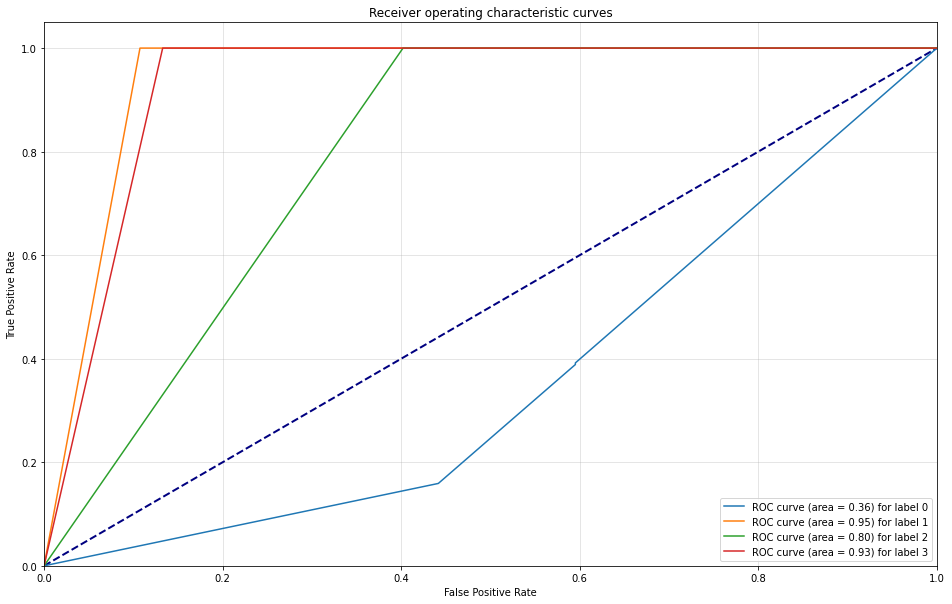

In [11]:
plot_multiclass_roc(abc, X_test, y_test, n_classes=4, figsize=(16, 10))

### Cross Validation
Fuente de consulta: https://machinelearningmastery.com/repeated-k-fold-cross-validation-with-python/

In [12]:
rf_cv_score=cross_val_score(estimator=abc, X=X_train, y=y_train, cv=10, n_jobs=-1)
print(rf_cv_score)

[0.65828327 0.65580102 0.65761803 0.6555528  0.65833292 0.65606911
 0.65781661 0.48511145 0.65697265 0.65746569]


In [13]:
# prepare the cross-validation procedure
cv = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores = cross_val_score(abc, X_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)

In [17]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.623 (0.068)


In [18]:
kf = RepeatedKFold(n_splits=10, n_repeats=5, random_state=None) 

for train_index, test_index in kf.split(X_train):
      print("Train:", train_index, "Validation:",test_index)
      x_train, x_test = X_train[train_index], X_train[test_index] 
      Y_train, Y_test = y_train[train_index], y_train[test_index]

Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      3       4       7 ... 1007127 1007128 1007144]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [      6      25      37 ... 1007114 1007131 1007133]
Train: [      0       1       2 ... 1007145 1007146 1007148] Validation: [      8      27      38 ... 1007119 1007124 1007147]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     16      19      21 ... 1007123 1007136 1007143]
Train: [      0       1       2 ... 1007144 1007147 1007148] Validation: [     12      45      46 ... 1007140 1007145 1007146]
Train: [      0       2       3 ... 1007146 1007147 1007148] Validation: [      1       9      29 ... 1007132 1007134 1007139]
Train: [      1       3       4 ... 1007145 1007146 1007147] Validation: [      0       2      13 ... 1007137 1007142 1007148]
Train: [      0       1       2 ... 1007146 1007147 1007148] Validation: [     10      11      31 ... 1007107 1

In [19]:
kf = KFold(n_splits=10)
for train, test in kf.split(X_train):
    print("%s %s" % (train, test))

[ 100715  100716  100717 ... 1007146 1007147 1007148] [     0      1      2 ... 100712 100713 100714]
[      0       1       2 ... 1007146 1007147 1007148] [100715 100716 100717 ... 201427 201428 201429]
[      0       1       2 ... 1007146 1007147 1007148] [201430 201431 201432 ... 302142 302143 302144]
[      0       1       2 ... 1007146 1007147 1007148] [302145 302146 302147 ... 402857 402858 402859]
[      0       1       2 ... 1007146 1007147 1007148] [402860 402861 402862 ... 503572 503573 503574]
[      0       1       2 ... 1007146 1007147 1007148] [503575 503576 503577 ... 604287 604288 604289]
[      0       1       2 ... 1007146 1007147 1007148] [604290 604291 604292 ... 705002 705003 705004]
[      0       1       2 ... 1007146 1007147 1007148] [705005 705006 705007 ... 805717 805718 805719]
[      0       1       2 ... 1007146 1007147 1007148] [805720 805721 805722 ... 906432 906433 906434]
[     0      1      2 ... 906432 906433 906434] [ 906435  906436  906437 ... 10071